#Projeto IMDB

##Introdução

Este projeto explora dados da indústria cinematográfica com o objetivo de identificar padrões relacionados ao sucesso financeiro e ao reconhecimento crítico de filmes. A análise considera variáveis como orçamento, faturamento, gênero, avaliações do público, data de lançamento e premiações com o Oscar.

O trabalho abrange as etapas de tratamento, análise exploratória e visualização de dados por meio de diferentes tipos de gráficos, com foco na análise de dados em um contexto real.

##Carregamento e tratamento dos dados

###Carregamento dos dados

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
from matplotlib.ticker import FuncFormatter

Dataset disponível em: https://bit.ly/49AOfcj

In [2]:
df_imdb = pd.read_csv('world_imdb_movies_top_movies_per_year.csv')

###Tratamento dos dados

Verificação de informações da tabela

In [3]:
df_imdb.describe() #informações de colunas com valores númericos

,year,rating_imdb,vote,budget,gross_world_wide,gross_us_canada,gross_opening_weekend,win,nomination,oscar
count,33600.000000,33462.000000,3.346200e+04,1.181500e+04,1.822200e+04,1.757100e+04,1.552300e+04,33600.0,33600.000000,33600.000000
mean,1992.393631,6.155158,6.637211e+04,8.454320e+07,3.814961e+07,1.808236e+07,5.110082e+06,0.0,4.850357,0.102619
std,18.957395,1.146070,6.653147e+05,2.866281e+09,1.210105e+08,4.853181e+07,1.488319e+07,0.0,17.719188,0.508687
min,1960.000000,1.100000,6.000000e+00,1.000000e+00,1.000000e+00,6.400000e+01,1.100000e+01,0.0,0.000000,0.000000
25%,1976.000000,5.500000,5.170000e+02,2.000000e+06,1.589938e+05,8.603650e+04,1.399650e+04,0.0,0.000000,0.000000
50%,1993.000000,6.300000,1.400000e+04,9.000000e+06,2.311544e+06,9.094110e+05,1.075360e+05,0.0,0.000000,0.000000
75%,2009.000000,7.000000,4.000000e+04,2.700000e+07,2.092931e+07,1.405137e+07,3.772558e+06,0.0,3.000000,0.000000
max,2024.000000,9.600000,2.600000e+07,3.000000e+11,2.923706e+09,9.366622e+08,3.571150e+08,0.0,433.000000,11.000000


In [4]:
df_imdb.info() #informações de dados nulos e datatype das colunas, além da contagem de dados (linhas e colunas)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33600 entries, 0 to 33599
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     33600 non-null  object 
 1   title                  33600 non-null  object 
 2   link                   33600 non-null  object 
 3   year                   33600 non-null  int64  
 4   duration               33379 non-null  object 
 5   rating_mpa             25624 non-null  object 
 6   rating_imdb            33462 non-null  float64
 7   vote                   33462 non-null  float64
 8   budget                 11815 non-null  float64
 9   gross_world_wide       18222 non-null  float64
 10  gross_us_canada        17571 non-null  float64
 11  gross_opening_weekend  15523 non-null  float64
 12  director               33241 non-null  object 
 13  writer                 32024 non-null  object 
 14  star                   33127 non-null  object 
 15  ge

In [5]:
df_imdb.head() #retorna as 5 primeiras linhas da tabela

,id,title,link,year,duration,rating_mpa,rating_imdb,vote,budget,gross_world_wide,...,writer,star,genre,country_origin,filming_location,production_company,language,win,nomination,oscar
0,tt0073470,Strip Nude for Your Killer,https://www.imdb.com/title/tt0073470,1975,1h 38m,Not Rated,5.6,33000.0,NaN,NaN,...,"Andrea Bianchi, Massimo Felisatti","Edwige Fenech, Nino Castelnuovo, Femi Benussi","Erotic Thriller, Giallo, Slasher Horror, Horro...",Italy,"Milan, Lombardia, Italy",FRAL Cinematografica,Italian,0,0,0
1,tt0072764,Carry on Behind,https://www.imdb.com/title/tt0072764,1975,1h 30m,Not Rated,5.6,31000.0,NaN,NaN,...,Dave Freeman,"Elke Sommer, Kenneth Williams, Bernard Bresslaw","Parody, Slapstick, Comedy",United Kingdom,"Bad Godesberg Way, Maidenhead, Berkshire, Engl...","The Rank Organisation, Peter Rogers Productions",English,0,0,0
2,tt0131526,"So Young, So Lovely, So Vicious...",https://www.imdb.com/title/tt0131526,1975,1h 30m,NaN,4.9,487.0,NaN,NaN,...,"Silvio Amadio, Roberto Natale","Gloria Guida, Dagmar Lassander, Fred Robsahm","Drama, Mystery, Thriller",Italy,"Sardinia, Italy",Domiziana Internazionale Cinematografica,Italian,0,0,0
3,tt0073335,Mahogany,https://www.imdb.com/title/tt0073335,1975,1h 49m,PG,6.1,23000.0,NaN,NaN,...,"John Byrum, Toni Amber","Diana Ross, Billy Dee Williams, Anthony Perkins","Drama, Romance",United States,Marshall Field Co Department Store 111 N Sta...,"Motown Productions, Nikor Productions, Paramou...","English, Italian",0,0,1
4,tt0073006,Foreplay,https://www.imdb.com/title/tt0073006,1975,1h 15m,R,4.0,185.0,NaN,NaN,...,"Dan Greenburg, Jack Richardson, Bruce Jay Frie...","Irwin Corey, Pat Paulsen, Deborah Loomis","Parody, Satire, Sketch Comedy, Comedy",United States,NaN,SynFrank Enterprises,English,0,0,0


In [6]:
df_imdb.isnull().sum() #retorna a quantidade de valores nulos de cada coluna


,0
id,0
title,0
link,0
year,0
duration,221
rating_mpa,7976
rating_imdb,138
vote,138
budget,21785
gross_world_wide,15378


Ajuste dos dados

In [7]:
df_imdb.columns= df_imdb.columns.str.strip() #remove espaços vazios no início e/ou fim do nome da coluna

In [8]:

col_null = ["gross_world_wide", "gross_us_canada", "gross_opening_weekend","director", "writer", "star", "genre", "country_origin","filming_location", "production_company", "language",
"duration", "rating_imdb", "vote"]  #dicionário com as colunas a serem modificadas

df_imdb["rating_mpa"] = df_imdb["rating_mpa"].fillna("Not Rated") #preenchimento de nulos em uma coluna específica com string
df_imdb["budget"] = df_imdb["budget"].fillna(0)                   #preenchimento de nulos em uma coluna específica com int
df_imdb[col_null] = df_imdb[col_null].fillna("N/A")               #preenchimento de nulos via "dicionário"
df_imdb .head()                                                   #retorna as 5 primeiras linhas da tabela

,id,title,link,year,duration,rating_mpa,rating_imdb,vote,budget,gross_world_wide,...,writer,star,genre,country_origin,filming_location,production_company,language,win,nomination,oscar
0,tt0073470,Strip Nude for Your Killer,https://www.imdb.com/title/tt0073470,1975,1h 38m,Not Rated,5.6,33000.0,0.0,N/A,...,"Andrea Bianchi, Massimo Felisatti","Edwige Fenech, Nino Castelnuovo, Femi Benussi","Erotic Thriller, Giallo, Slasher Horror, Horro...",Italy,"Milan, Lombardia, Italy",FRAL Cinematografica,Italian,0,0,0
1,tt0072764,Carry on Behind,https://www.imdb.com/title/tt0072764,1975,1h 30m,Not Rated,5.6,31000.0,0.0,N/A,...,Dave Freeman,"Elke Sommer, Kenneth Williams, Bernard Bresslaw","Parody, Slapstick, Comedy",United Kingdom,"Bad Godesberg Way, Maidenhead, Berkshire, Engl...","The Rank Organisation, Peter Rogers Productions",English,0,0,0
2,tt0131526,"So Young, So Lovely, So Vicious...",https://www.imdb.com/title/tt0131526,1975,1h 30m,Not Rated,4.9,487.0,0.0,N/A,...,"Silvio Amadio, Roberto Natale","Gloria Guida, Dagmar Lassander, Fred Robsahm","Drama, Mystery, Thriller",Italy,"Sardinia, Italy",Domiziana Internazionale Cinematografica,Italian,0,0,0
3,tt0073335,Mahogany,https://www.imdb.com/title/tt0073335,1975,1h 49m,PG,6.1,23000.0,0.0,N/A,...,"John Byrum, Toni Amber","Diana Ross, Billy Dee Williams, Anthony Perkins","Drama, Romance",United States,Marshall Field Co Department Store 111 N Sta...,"Motown Productions, Nikor Productions, Paramou...","English, Italian",0,0,1
4,tt0073006,Foreplay,https://www.imdb.com/title/tt0073006,1975,1h 15m,R,4.0,185.0,0.0,N/A,...,"Dan Greenburg, Jack Richardson, Bruce Jay Frie...","Irwin Corey, Pat Paulsen, Deborah Loomis","Parody, Satire, Sketch Comedy, Comedy",United States,N/A,SynFrank Enterprises,English,0,0,0


##Análises Exploratórias

###Análises Gerais





Distribuição de notas






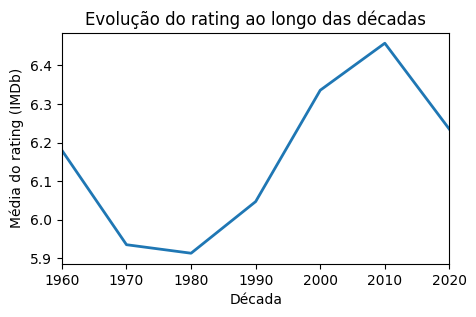

In [9]:
df_imdb['rating_imdb'] = pd.to_numeric(df_imdb['rating_imdb'], errors='coerce') #convertendo a coluna de rating para float
df_decadas = df_imdb[["year", "rating_imdb"]].copy()                            #novo dataframe
df_decadas["decada"] = (df_decadas["year"] // 10) * 10                          #ajustando os anos para aparecerem como décadas
#df_decadas.info()                                                              #verificação de datatype
#remove décadas e notas nulas. agrupa os dados pela década (dentro de cada década seleciona a coluna de rating).calcula a média das notas por década e ajusta o indice
df_decadas = (df_decadas.dropna(subset=["decada", "rating_imdb"]).groupby("decada")["rating_imdb"].mean().reset_index())


#tamanho do gráfico
plt.figure(figsize=(5,3))
#plotagem
plt.plot(df_decadas["decada"], df_decadas["rating_imdb"], linewidth=2)
plt.xlabel("Década")
plt.ylabel("Média do rating (IMDb)")
plt.title("Evolução do rating ao longo das décadas")
#ajuste do eixo X
plt.xlim(df_decadas["decada"].min(), df_decadas["decada"].max())
#apresentação
plt.show()

In [10]:
#verificação
media = df_imdb.query("year >= 2000 and year <= 2009")["rating_imdb"].mean() #verificação de dados do gráfico acima (apenas trocar os anos)
print(media)

6.335422904191617




---


O gráfico demonstra que a variação de notas ao longo das décadas é baixo, apresentando uma maior variação negativa entre os anos 70 e 80.


---



Quantidade de filmes lançados por décadas

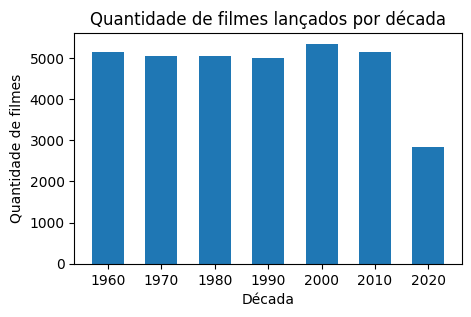

In [11]:
# Criar novo dataframe com contagem de filmes por década
df_qtd_filmes = df_imdb[["year", "id"]].copy()                                #novo dataframe
df_qtd_filmes["decada"] = (df_qtd_filmes["year"] // 10) * 10                  #ajustando os anos para aparecerem como décadas
df_qtd_filmes = df_qtd_filmes.groupby("decada")["id"].count().reset_index()   #agrupamento, contagem e ajuste de indice
df_qtd_filmes.columns = ["decada", "id"]                                      #definição de colunas do dataframe
#df_qtd_filmes.head()


#tamanho do gráfico
plt.figure(figsize=(5,3))
#plotagem
plt.bar(df_qtd_filmes["decada"], df_qtd_filmes["id"], width=6)
plt.xlabel("Década")
plt.ylabel("Quantidade de filmes")
plt.title("Quantidade de filmes lançados por década")
#apresentação
plt.show()



---


Foi verificado que a quantidade média de filmes lançados por ano é de 5 mil, os anos 2020 estão abaixo devido a não finalização da década.


---



Filmes por gênero

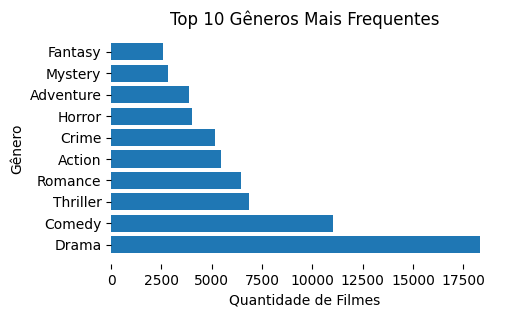

In [12]:
df_genero = df_imdb[["genre", "id"]].copy()                                                #novo dataframe
df_genero["genre"] = df_genero["genre"].str.replace(", ", ",", regex=False).str.split(",") #ajuste de formato de coluna para contabilizar cada genero das colunas separadamente por meio da criação de uma lista
df_genero = df_genero.explode("genre")                                                     #como algumas colunas tem mais de um genero, abre uma linha por genero
df_genero = df_genero.groupby("genre")["id"].count().reset_index()                         #agrupamento, contagem e ajuste de indice
df_genero.columns = ["genre", "id"]                                                        #definição de colunas do dataframe
df_genero = df_genero.sort_values(by="id", ascending=False)                                #ordenação
#df_genero = df_genero.head(30)                                                            #verificação das 30 primeiras linhas
df_gen10 = df_genero.head(10).copy()                                                       #seleção das 10 primeiras linhas em um novo dataframe
df_gen10 = df_gen10.sort_values("id", ascending=False)                                     #ordenação decrescente
#df_gen10.head()

#tamanho do gráfico
plt.figure(figsize=(5,3))
#plotagem
plt.barh(df_gen10["genre"], df_gen10["id"])
plt.xlabel("Quantidade de Filmes")
plt.ylabel("Gênero")
plt.title("Top 10 Gêneros Mais Frequentes")
#retirada de bordas e grids
ax = plt.gca()
ax.grid(False)
for spine in ax.spines.values():
    spine.set_visible(False)
#apresentação
plt.show()


Top Roteristas

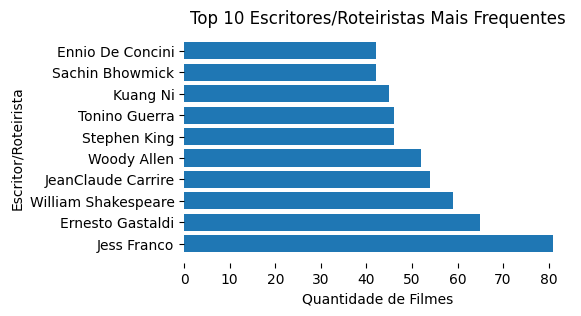

In [13]:
df_writer = df_imdb[["writer", "id"]].copy()                                                   #novo dataframe
df_writer["writer"] = df_writer["writer"].str.replace(", ", ",", regex=False).str.split(",")   #ajuste de formato de coluna para contabilizar cada roteirista das colunas separadamente por meio da criação de uma lista
df_writer = df_writer.explode("writer")                                                        #como algumas colunas tem mais de um roteirista, abre uma linha por roteirista
df_writer = df_writer.groupby("writer")["id"].count().reset_index()                            #agrupamento, contagem e ajuste de indice
df_writer["writer"] = df_writer["writer"].replace("N/A", np.nan)                               #transforma N/A em nulo
df_writer = df_writer.dropna(subset=["writer"])                                                #remove valores nulos
df_writer = df_writer.sort_values(by="id", ascending=False)                                    #ordenação
df_wrt10 = df_writer.head(10).copy()                                                           #seleção das 10 primeiras linhas em um novo dataframe
df_wrt10 = df_wrt10.sort_values("id", ascending=False)                                          #ordenação decrescente
#df_wrt10.head(10)

#tamanho do gráfico
plt.figure(figsize=(5,3))
#plotagem
plt.barh(df_wrt10["writer"], df_wrt10["id"])
plt.xlabel("Quantidade de Filmes")
plt.ylabel("Escritor/Roteirista")
plt.title("Top 10 Escritores/Roteiristas Mais Frequentes")
#retirada de bordas e grids
ax = plt.gca()
ax.grid(False)
for spine in ax.spines.values():
    spine.set_visible(False)
#apresentação
plt.show()

Evolução da duração média dos filmes

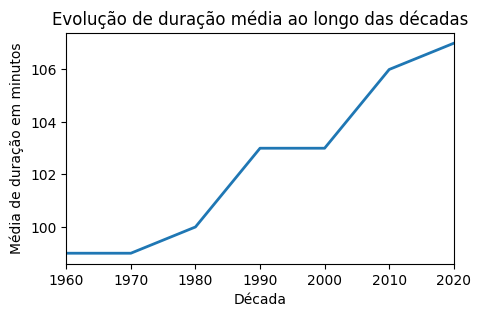

In [14]:
df_tempo = df_imdb[["duration", "id", "year"]].copy()
df_tempo["duracao_min"] = (df_tempo["duration"].str.extract(r'(?:(\d+)h)?\s*(?:(\d+)m)?').fillna(0).astype(int).pipe(lambda x: x[0] * 60 + x[1])) #captura horas e minutos separadamente e converte para minutos
df_tempo = df_tempo[(df_tempo["duracao_min"] >= 30) & (df_tempo["duracao_min"] <= 400)]                                                           #remoção de outliers
df_tempo["decada"] = (df_tempo["year"] // 10) * 10                                                                                                #ajustando os anos para aparecerem como décadas
df_tempo = df_tempo.groupby("decada")["duracao_min"].mean().astype(int).reset_index()                                                             #agrupamento, contagem e ajuste de indice
df_tempo.columns = ["decada", "duracao_min"]                                                                                                      #definição de colunas do dataframe
#df_tempo.head(10)

#tamanho do gráfico
plt.figure(figsize=(5,3))
#plotagem
plt.plot(df_tempo["decada"], df_tempo["duracao_min"], linewidth=2)
plt.xlabel("Década")
plt.ylabel("Média de duração em minutos")
plt.title("Evolução de duração média ao longo das décadas")
#ajuste do eixo X
plt.xlim(df_tempo["decada"].min(), df_tempo["decada"].max())
#apresentação
plt.show()



---

Por meio do gráfico é possível verificar que a duração média dos filmes sofreu pouca variação ao longo das decadas, variando menos de 10 minutos.


---



Orçamento médio por década

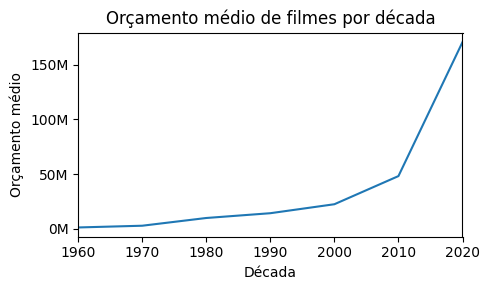

In [15]:
df_orc = df_imdb[["budget", "id", "year"]].copy()
df_orc["decada"] = (df_orc["year"] // 10) * 10                                #ajuste de décadas
df_orc['budget'] = pd.to_numeric(df_orc['budget'],errors='coerce')            #padroniza nulos
df_orc = df_orc.dropna(subset=['budget'])                                     #remove valores nulos
df_orc['budget'] = df_orc['budget'].astype(int)                               #converte para inteiro
df_orc = df_orc.groupby('decada', as_index=False)['budget'].mean()            #média por gênero


#plotagem
plt.figure(figsize=(5,3))
plt.plot(df_orc['decada'], df_orc['budget'])
plt.xlabel('Década')
plt.ylabel('Orçamento médio')
plt.title('Orçamento médio de filmes por década')
# formatação eixo Y para milhões
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x/1e6:.0f}M'))
# garantir que todas as décadas apareçam corretamente no eixo X
plt.xticks(df_orc['decada'])
#ajuste do eixo X
plt.xlim(df_tempo["decada"].min(), df_tempo["decada"].max())
#ajustes estéticos
plt.grid(False)
plt.tight_layout()
plt.show()



---
Pode-se verificar que o orçamento dos filmes cresceram bastante ao longo das décadas, o que pode ser explicado pelo o aumento do uso de efeitos especiais ao longo dos anos.


---




###Premiações

Relação entre Orçamento e Premiações no Oscar

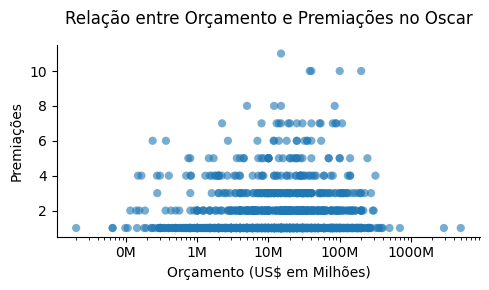

In [16]:
df_oscar = df_imdb[(df_imdb['budget'] > 0) & (df_imdb['oscar'] > 0)] #retorna os filmes que ganharam oscar e que tenham o orçamento descrito
#df_oscar[['budget','oscar']].corr()                                  #correlação entre orçamento e premiações com o Oscar

#tamanho do gráfico
plt.figure(figsize=(5,3))
#dados para plotagem
plt.scatter(df_oscar['budget'],df_oscar['oscar'],s=35,alpha=0.6,edgecolor='none')
#título e labels
plt.title("Relação entre Orçamento e Premiações no Oscar", fontsize=12, pad=15)
plt.xlabel("Orçamento (US$ em Milhões)", fontsize=10)
plt.ylabel("Premiações", fontsize=10)
#estética
ax = plt.gca()
ax.spines[['top', 'right']].set_visible(False)
#escala de log devido alta variação dos valores de orçamento
plt.xscale('log')
#ajuste do eixo X para valores aparecerem no formato xxxM
plt.gca().xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x/1e6:.0f}M'))
#apresentação
plt.tight_layout()
plt.show()



---


Como a correlação é praticamente zero pode-se ter como conclusão que as premiações pelo Oscar não se explicam apenas pelo orçamento do filme, pois não há uma relação direta entre esse fator e a premiação.



---





Relação entre Rating no IMDB e Premiações no Oscar

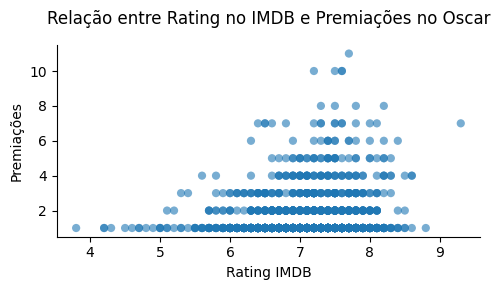

In [17]:
df_imdb['rating_imdb'] = pd.to_numeric(df_imdb['rating_imdb'], errors='coerce') #convertendo a coluna de rating para float
df_oscar_notas = df_imdb[(df_imdb['rating_imdb'] > 0) & (df_imdb['oscar'] > 0)] #retorna os filmes que ganharam oscar e que tenham rating maior que zero
#df_oscar_notas[['rating_imdb','oscar']].corr()                                 #correlação entre o rating do filme no IMDB e premiações com o Oscar

#tamanho do gráfico
plt.figure(figsize=(5,3))
#dados para plotagem
plt.scatter(df_oscar['rating_imdb'],df_oscar['oscar'],s=35,alpha=0.6,edgecolor='none')
#título e labels
plt.title("Relação entre Rating no IMDB e Premiações no Oscar", fontsize=12, pad=15)
plt.xlabel("Rating IMDB", fontsize=10)
plt.ylabel("Premiações", fontsize=10)
#estética
ax = plt.gca()
ax.spines[['top', 'right']].set_visible(False)
#apresentação
plt.tight_layout()
plt.show()



---


Pela correlação acima pode-se concluir que o *rating* do IMDB também não indica que o filme tenha mais chances de
ganhar um Oscar.


---



###Notas, duração - filmes menores que 3h- e estilo

Relação entre notas e duração

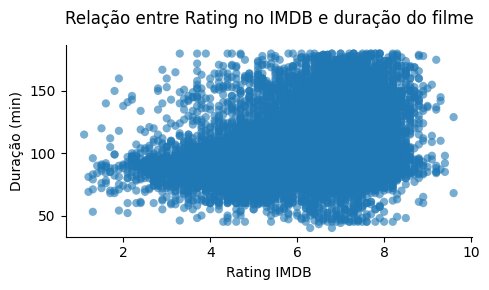

In [18]:
df_duracao_notas = df_imdb[["duration", "rating_imdb", "genre"]].copy()                                                                                           #novo dataframe
df_duracao_notas["duracao_min"] = (df_duracao_notas["duration"].str.extract(r'(?:(\d+)h)?\s*(?:(\d+)m)?').fillna(0).astype(int).pipe(lambda x: x[0] * 60 + x[1])) #captura horas e minutos separadamente e converte para minutos
df_duracao_notas = df_duracao_notas[(df_duracao_notas["duracao_min"] >= 30) & (df_duracao_notas["duracao_min"] <= 180)]                                           #remoção de outliers
#df_duracao_notas[['rating_imdb','duracao_min']].corr()                                                                                                           #correlação entre o rating do filme no IMDB e a duração

#tamanho do gráfico
plt.figure(figsize=(5,3))
#dados para plotagem
plt.scatter(df_duracao_notas['rating_imdb'],df_duracao_notas['duracao_min'],s=35,alpha=0.6,edgecolor='none')
#título e labels
plt.title("Relação entre Rating no IMDB e duração do filme", fontsize=12, pad=15)
plt.xlabel("Rating IMDB", fontsize=10)
plt.ylabel("Duração (min)", fontsize=10)
#estética
ax = plt.gca()
ax.spines[['top', 'right']].set_visible(False)
#apresentação
plt.tight_layout()
plt.show()



---


O gráfico indica que não há influência significativa entre o *rating* e a duração do filme. Pode-se verificar que há uma concentração de filmes com duração entre 80 e 140 minutos em quase todas as faixas de notas o que indica que esse fator não é relevante.

---



Duração média por gênero

In [19]:
df_duracao_notas["genre"] = df_duracao_notas["genre"].str.replace(", ", ",", regex=False).str.split(",") #ajuste de formato de coluna para contabilizar cada genero das colunas separadamente por meio da criação de uma lista
df_duracao_notas = df_duracao_notas.explode("genre")                                                     #como algumas colunas tem mais de um genero, abre uma linha por genero
df_duracao_notas = df_duracao_notas.groupby("genre")["duracao_min"].mean().astype(int).reset_index()     #agrupamento, contagem e ajuste de indice
df_duracao_notas.columns = ["genre", "duracao_min"]                                                      #definição de colunas do dataframe
df_duracao_notas = df_duracao_notas.sort_values(by="duracao_min", ascending=False)                       #ordenação
df_duracao_notas.head(30)                                                                                #verificação das 30 primeiras linhas - modificar pelo quanto de dados que analisar

,genre,duracao_min
49,Epic,142
73,Historical Epic,142
186,Western Epic,139
23,Classic Musical,138
182,War Epic,138
1,Action Epic,134
127,Romantic Epic,129
131,SciFi Epic,128
4,Adventure Epic,127
88,Korean Drama,126


Dispersão de notas por gêneros

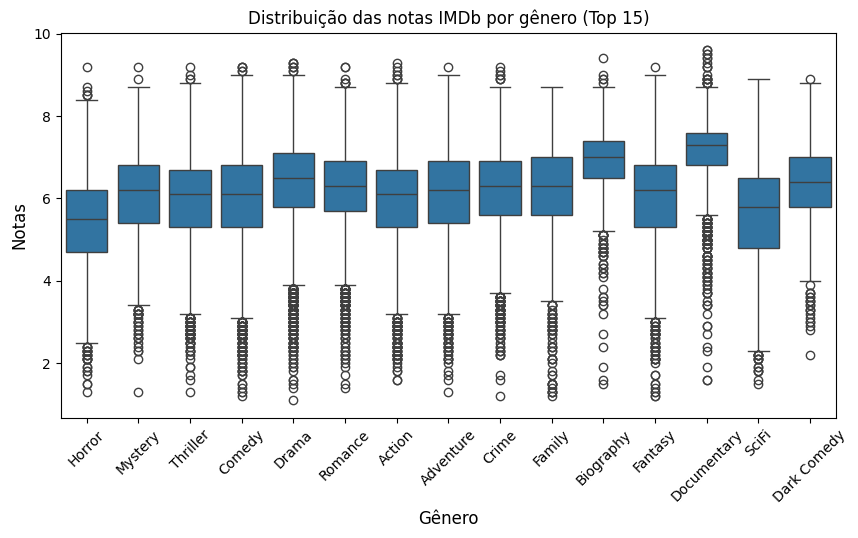

In [20]:

df_generos = df_imdb[['genre', 'rating_imdb']].copy()                                          #novo dataframe
df_generos['genre'] = (df_generos['genre'].str.replace(", ", ",", regex=False).str.split(",")) #separação da coluna de gêneros pelo separador de vírgula
df_generos = df_generos.explode('genre').reset_index(drop=True)                                #abre uma linha por gênero
top_15_generos = (df_generos['genre'].value_counts().head(15).index)                           #seleciona os 15 gêneros mais frequentes

df_graph = df_generos[df_generos['genre'].isin(top_15_generos)]                                #seleção de dados para criação do gráfico

#plotagem
plt.figure(figsize=(10, 5))
#criar o boxplot e capturar o objeto ax
ax = sns.boxplot(data=df_graph, x='genre', y='rating_imdb')
#definir rótulos para os eixos X e Y
ax.set_xlabel('Gênero', size=12)
ax.set_ylabel('Notas', size=12)
plt.title('Distribuição das notas IMDb por gênero (Top 15)')
#impede sobreposições de legendas devido ter muitas categorias
plt.xticks(rotation=45)
#apresentação
plt.show()


---


Para evitar poluição visual, a análise foi restrita aos 15 gêneros com maior volume de filmes. Os boxplots evidenciam a distribuição das notas, incluindo mediana, quartis e outliers, permitindo comparar a variação das notas entre os gêneros.


---



Gêneros com mais prêmios Oscar

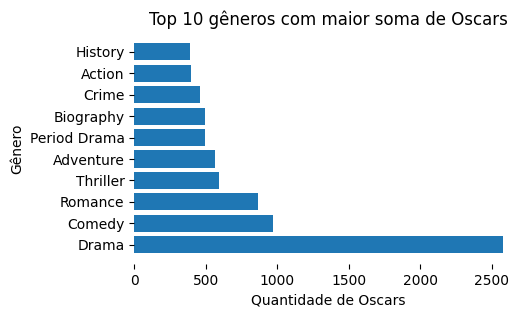

In [21]:
df_pr_gn = df_imdb[(df_imdb['oscar'] > 0) & (df_imdb['genre'])]                            #retorna os filmes que ganharam oscar
df_pr_gn = df_pr_gn[['genre', 'oscar']].copy()                                             #novo dataframe
df_pr_gn['genre'] = (df_pr_gn['genre'].str.replace(", ", ",", regex=False).str.split(",")) #separação da coluna de gêneros pelo separador de vírgula
df_pr_gn = df_pr_gn.explode('genre').reset_index(drop=True)                                #abre uma linha por gênero
df_pr_gn = df_pr_gn.groupby('genre', as_index=False)['oscar'].sum()                        #soma premiações por genero

df_top10_prgn = (df_pr_gn.sort_values('oscar', ascending=False).head(10))                  #10 generos de filmes com maior soma de Oscars

#plotagem
plt.figure(figsize=(5,3))
plt.barh(df_top10_prgn["genre"], df_top10_prgn["oscar"])
plt.xlabel('Quantidade de Oscars')
plt.ylabel('Gênero')
plt.title('Top 10 gêneros com maior soma de Oscars')
#retirada de bordas e grids
ax = plt.gca()
ax.grid(False)
for spine in ax.spines.values():
    spine.set_visible(False)
#apresentação
plt.show()

Quantidade de filmes por gênero e década

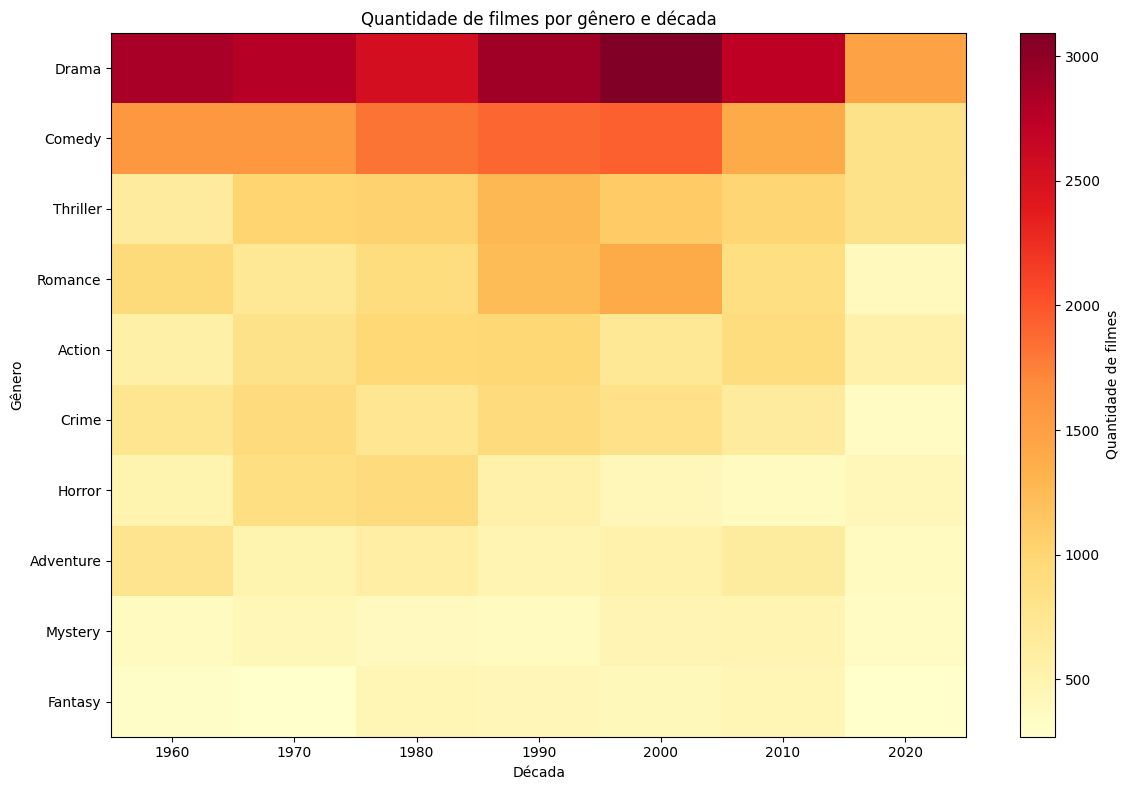

In [22]:
df_genpop = df_imdb[['id', 'year', 'genre']].copy()
df_genpop['decada'] = (df_genpop['year'] // 10) * 10
df_genpop['genre'] = (df_genpop['genre'].str.replace(", ", ",", regex=False).str.split(","))
df_genpop = df_genpop.explode('genre').reset_index(drop=True)
df_heat = (df_genpop.groupby(['decada', 'genre'])['id'].nunique().reset_index(name='qtd_filmes'))           #contagem dos filmes
heatmap_data = df_heat.pivot(index='genre', columns='decada', values='qtd_filmes').fillna(0)                #dataset para o heatmap
heatmap_data = heatmap_data.loc[heatmap_data.sum(axis=1).sort_values(ascending=False).index]                #ordenação do heatmap
generos_top = (df_heat.groupby('genre')['qtd_filmes'].sum().sort_values(ascending=False).head(10).index)    #separaçaõ dos top 10 generos

#definiçao dos dados para o gráfico
heatmap_data = heatmap_data.loc[generos_top]

#plotagem do gráfico
plt.figure(figsize=(12, 8))
plt.imshow(heatmap_data, aspect='auto', cmap='YlOrRd')
plt.colorbar(label='Quantidade de filmes')
plt.xticks(ticks=range(len(heatmap_data.columns)), labels=heatmap_data.columns)
plt.yticks(ticks=range(len(heatmap_data.index)), labels=heatmap_data.index)
plt.xlabel('Década')
plt.ylabel('Gênero')
plt.title('Quantidade de filmes por gênero e década')
plt.tight_layout()
plt.show()





---
De acordo com o apresentado pelo gráfico é possível afirmar que drama é consistentemente o tipo de filme mais lançado ao longo das décadas.


---




Notas dos filmes por gênero e década

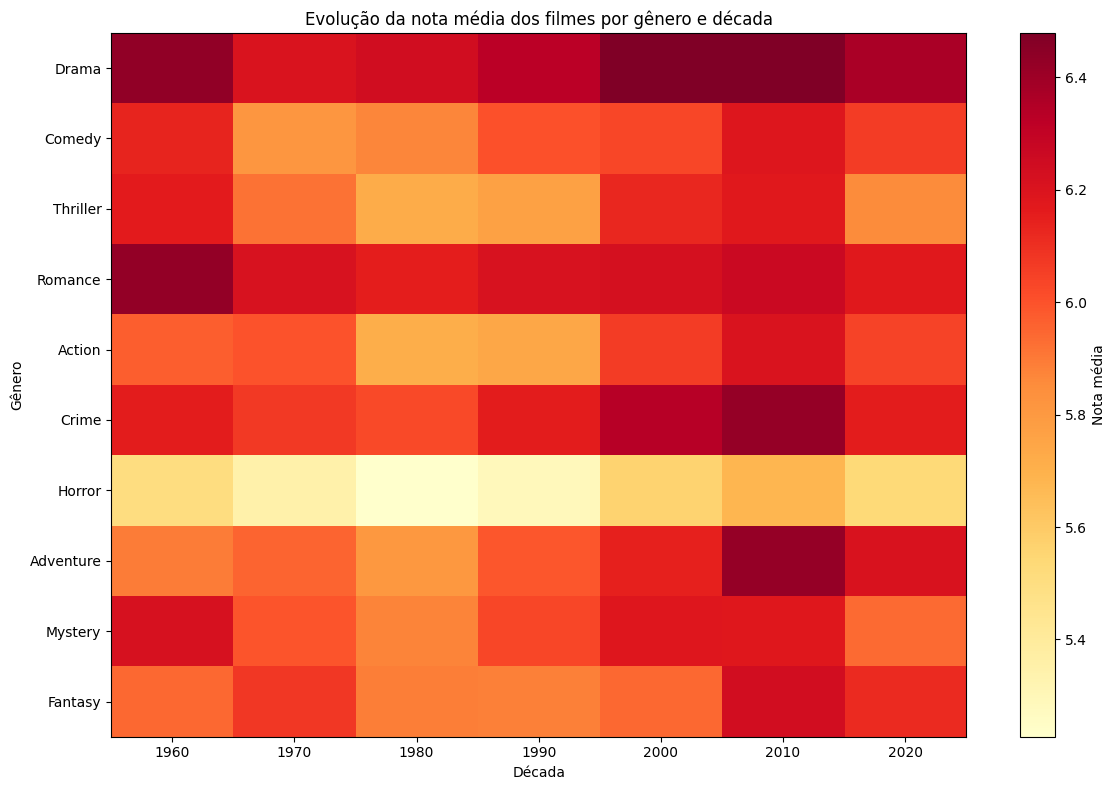

In [23]:
df_rating = df_imdb[['id', 'year', 'genre', 'rating_imdb']].copy()                                               #definição de campos
df_rating['decada'] = (df_rating['year'] // 10) * 10                                                             #ajustando os anos para aparecerem como décadas
df_rating['rating_imdb'] = pd.to_numeric(df_rating['rating_imdb'], errors='coerce')                              #ajuste de datatype
df_rating = df_rating.dropna(subset=['rating_imdb'])                                                             #remoção de nulos
df_rating['genre'] = (df_rating['genre'].str.replace(", ", ",", regex=False).str.split(","))                     #separação de linhas com mais de um gênero
df_rating = df_rating.explode('genre').reset_index(drop=True)
df_heat_rating = (df_rating.groupby(['decada', 'genre'])['rating_imdb'].mean().reset_index(name='nota_media'))   #agrupamento da média de notas por genero e decada
heatmap_rating = df_heat_rating.pivot(index='genre', columns='decada', values='nota_media')                      #matriz do heatmap
generos_validos = (df_rating.groupby('genre')['id'].nunique().sort_values(ascending=False).head(10).index)       #filtragem de generos
heatmap_rating = heatmap_rating.loc[generos_validos]                                                             #ajuste do dataset com os dados da filtragem

#plotagem
plt.figure(figsize=(12, 8))

plt.imshow(heatmap_rating, aspect='auto', cmap='YlOrRd')
plt.colorbar(label='Nota média')
plt.xticks(ticks=range(len(heatmap_rating.columns)), labels=heatmap_rating.columns)
plt.yticks(ticks=range(len(heatmap_rating.index)), labels=heatmap_rating.index)

plt.xlabel('Década')
plt.ylabel('Gênero')
plt.title('Evolução da nota média dos filmes por gênero e década')

plt.tight_layout()
plt.show()

###Faturamento

Faturamento médio por gênero

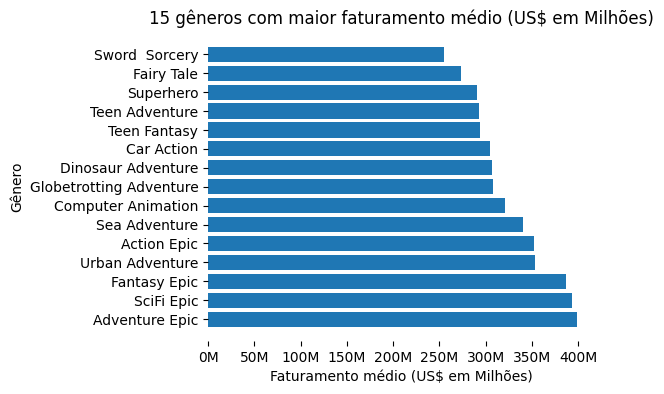

In [24]:
df_faturamento = df_imdb[['gross_world_wide', 'genre']].copy()                                         #novo dataframe
df_faturamento['genre'] = df_faturamento['genre'].str.replace(", ", ",", regex=False)                  #remove espaços
df_faturamento['genre'] = df_faturamento['genre'].str.split(',')                                       #separa gêneros
df_faturamento = df_faturamento.explode('genre').reset_index(drop=True)                                #uma linha por gênero
df_faturamento['gross_world_wide'] = pd.to_numeric(df_faturamento['gross_world_wide'],errors='coerce') #padroniza nulos
df_faturamento = df_faturamento.dropna(subset=['gross_world_wide'])                                    #remove valores nulos
df_faturamento['gross_world_wide'] = df_faturamento['gross_world_wide'].astype(int)                    #converte para inteiro
df_faturamento = df_faturamento.groupby('genre', as_index=False)['gross_world_wide'].mean()            #média por gênero

df_top15_gen = (df_faturamento.sort_values('gross_world_wide', ascending=False).head(15))              #15 gêneros com maior média de faturamento

#plotagem
plt.figure(figsize=(5,4))
plt.barh(df_top15_gen["genre"], df_top15_gen["gross_world_wide"])
plt.xlabel('Faturamento médio (US$ em Milhões)')
plt.ylabel('Gênero')
plt.title('15 gêneros com maior faturamento médio (US$ em Milhões)')
#ajuste do eixo X para valores aparecerem no formato xxxM
plt.gca().xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x/1e6:.0f}M'))
#retirada de bordas e grids
ax = plt.gca()
ax.grid(False)
for spine in ax.spines.values():
    spine.set_visible(False)
#apresentação
plt.show()





---


Como em alguns casos um filme aparece com mais de um gênero no dataset, a distribuição de valores aparece mais diluída do que quando verificado por diretor, por exemplo.


---



###Diretores

Diretores com o melhor desempenho financeiro médio.

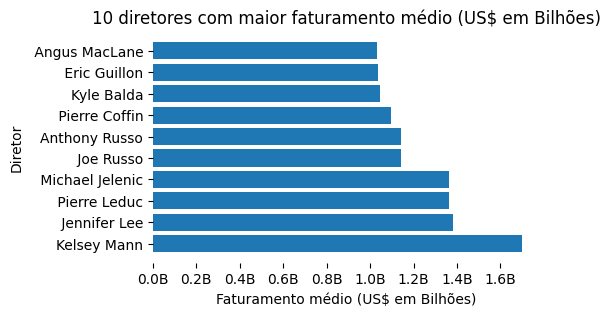

In [25]:
df_dirgrs = df_imdb[['gross_world_wide', 'director']].copy()                                 #novo dataframe
df_dirgrs['director'] = df_dirgrs['director'].str.split(',')                                 #separa diretor
df_dirgrs = df_dirgrs.explode('director').reset_index(drop=True)                             #uma linha por diretor
df_dirgrs['gross_world_wide'] = pd.to_numeric(df_dirgrs['gross_world_wide'],errors='coerce') #padroniza nulos
df_dirgrs = df_dirgrs.dropna(subset=['gross_world_wide'])                                    #remove valores nulos
df_dirgrs['gross_world_wide'] = df_dirgrs['gross_world_wide'].astype(int)                    #converte para inteiro
df_dirgrs = df_dirgrs.groupby('director', as_index=False)['gross_world_wide'].mean()         #média por diretor

df_top10_dir = (df_dirgrs.sort_values('gross_world_wide', ascending=False).head(10))         #10 diretores com maior média de faturamento

#plotagem
plt.figure(figsize=(5,3))
plt.barh(df_top10_dir["director"], df_top10_dir["gross_world_wide"])
plt.xlabel('Faturamento médio (US$ em Bilhões)')
plt.ylabel('Diretor')
plt.title('10 diretores com maior faturamento médio (US$ em Bilhões)')
#ajuste do eixo X para valores aparecerem no formato xxxB
plt.gca().xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x/1e9:.1f}B'))
#retirada de bordas e grids
ax = plt.gca()
ax.grid(False)
for spine in ax.spines.values():
    spine.set_visible(False)
#apresentação
plt.show()



---


Por meio desse gráfico é possível verificar que diretores de filmes de animação são os que faturaram mais.


---



Diretores com mais filmes premiados no Oscar

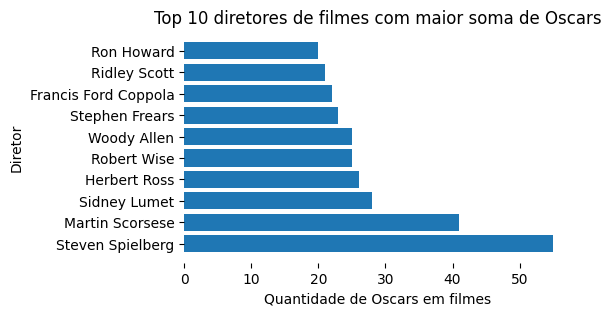

In [26]:
df_prem = df_imdb[(df_imdb['oscar'] > 0) & (df_imdb['director'])]                        #retorna os filmes que ganharam oscar
df_prem = df_prem[['director', 'oscar']].copy()                                          #novo dataframe
df_prem['director'] = df_prem['director'].str.split(',')                                 #separa diretor
df_prem = df_prem.explode('director').reset_index(drop=True)                             #uma linha por diretor
df_prem = df_prem.groupby('director', as_index=False)['oscar'].sum()                     #soma premiações por diretor

df_top10_prm = (df_prem.sort_values('oscar', ascending=False).head(10))                  #10 diretores com filmes com maior soma de Oscars

#plotagem
plt.figure(figsize=(5,3))
plt.barh(df_top10_prm["director"], df_top10_prm["oscar"])
plt.xlabel('Quantidade de Oscars em filmes')
plt.ylabel('Diretor')
plt.title('Top 10 diretores de filmes com maior soma de Oscars')

#retirada de bordas e grids
ax = plt.gca()
ax.grid(False)
for spine in ax.spines.values():
    spine.set_visible(False)
#apresentação
plt.show()



##Conclusões

Perguntas relevantes que são mostradas pelo estudo dos dados.


Quais fatores estão associados ao sucesso financeiro de um filme?
A análise de faturamento por diretor indica que filmes de animação concentram os maiores valores de faturamento, sugerindo que o gênero possui maior apelo comercial e capacidade de retorno financeiro, independentemente de outros fatores analisados.

Quais características são mais recorrentes em filmes vencedores do Oscar?
Os dados evidenciam que o gênero drama é predominante entre os filmes premiados. No entanto, não foram identificadas correlações consistentes entre premiações, notas atribuídas pelo público e orçamento, o que indica que a premiação com o Oscar não está diretamente associada à popularidade ou ao orçamento do filme.

Como o cinema evoluiu nas últimas décadas em termos de orçamento, duração e temática?
Observa-se um crescimento significativo do orçamento médio dos filmes ao longo das décadas, refletindo a ampliação dos investimentos na indústria. Já a duração média dos filmes permaneceu relativamente estável. Em relação à temática, o gênero drama se manteve como o mais produzido ao longo do período analisado.

Quais fatores exercem maior influência sobre a nota dos filmes?
A análise demonstra que o gênero é o fator mais relevante na distribuição das notas. Em todas as décadas, filmes de drama apresentam as maiores médias de avaliação, enquanto filmes de terror concentram as notas mais baixas.


